In [1]:
from Yugiquery import *
header()

<div align='center'>
    <br>
    <pre>
    ██    ██ ██    ██  ██████  ██  ██████  ██    ██ ███████ ██████  ██    ██ 
     ██  ██  ██    ██ ██       ██ ██    ██ ██    ██ ██      ██   ██  ██  ██  
      ████   ██    ██ ██   ███ ██ ██    ██ ██    ██ █████   ██████    ████   
       ██    ██    ██ ██    ██ ██ ██ ▄▄ ██ ██    ██ ██      ██   ██    ██    
       ██     ██████   ██████  ██  ██████   ██████  ███████ ██   ██    ██    
                                      ▀▀                                     
    </pre>
</div>
<div align='right'>
     - Last modified: 17/12/2022 18:47 UTC <br>
    By <b>Guilherme Ruiz</b>
</div>

Table of Contents
=================

*   [1  Data aquisition](#Data-aquisition)
    *   [1.1  Fetch online data](#Fetch-online-data)
    *   [1.2  Format data](#Format-data)
    *   [1.3  Save data](#Save-data)
*   [2  Check changes](#Check-changes)
    *   [2.1  Load latest file](#Load-latest-file)
    *   [2.2  Generate changelog](#Generate-changelog)
*   [3  Data visualization](#Data-visualization)
    *   [3.1  Full data](#Full-data)
    *   [3.2  Card types](#Card-types)
    *   [3.3  Monsters](#Monsters)
        *   [3.3.1  Attributes](#Attributes)
        *   [3.3.2  Primary types](#Primary-types)
            *   [3.3.2.1  Has effect discrimination](#Has-effect-discrimination)
            *   [3.3.2.2  Is pendulum discrimination](#Is-pendulum-discrimination)
            *   [3.3.2.3  By attribute](#By-attribute)
        *   [3.3.3  Secondary types](#Secondary-types)
            *   [3.3.3.1  By attribute](#By-attribute)
            *   [3.3.3.2  By secondary type](#By-secondary-type)
        *   [3.3.4  Monster types](#Monster-types)
            *   [3.3.4.1  By Attribute](#By-Attribute)
            *   [3.3.4.2  By primary type](#By-primary-type)
            *   [3.3.4.3  By secondary type](#By-secondary-type)
        *   [3.3.5  Effect type](#Effect-type)
        *   [3.3.6  ATK](#ATK)
        *   [3.3.7  DEF](#DEF)
        *   [3.3.8  Level/Rank](#Level/Rank)
            *   [3.3.8.1  ATK statistics](#ATK-statistics)
            *   [3.3.8.2  DEF statistics](#DEF-statistics)
        *   [3.3.9  Pendulum scale](#Pendulum-scale)
            *   [3.3.9.1  ATK statistics](#ATK-statistics)
            *   [3.3.9.2  DEF statistics](#DEF-statistics)
            *   [3.3.9.3  Level/Rank statistics](#Level/Rank-statistics)
        *   [3.3.10  Link](#Link)
            *   [3.3.10.1  ATK statistics](#ATK-statistics)
        *   [3.3.11  Link Arrows](#Link-Arrows)
            *   [3.3.11.1  By combination](#By-combination)
            *   [3.3.11.2  By unique](#By-unique)
            *   [3.3.11.3  By link](#By-link)
    *   [3.4  Spell & Trap](#Spell-&-Trap)
        *   [3.4.1  Properties](#Properties)
        *   [3.4.2  Effect type](#Effect-type)
            *   [3.4.2.1  Spell & Trap discrimination](#Spell-&-Trap-discrimination)
    *   [3.5  Archseries](#Archseries)
        *   [3.5.1  By card type](#By-card-type)
        *   [3.5.2  By primary type](#By-primary-type)
        *   [3.5.3  By secondary type](#By-secondary-type)
        *   [3.5.4  By monster type](#By-monster-type)
        *   [3.5.5  By property](#By-property)
    *   [3.6  Artworks](#Artworks)
        *   [3.6.1  By card type](#By-card-type)
        *   [3.6.2  By primary type](#By-primary-type)
    *   [3.7  Errata](#Errata)
        *   [3.7.1  By card type](#By-card-type)
        *   [3.7.2  By primary type](#By-primary-type)
        *   [3.7.3  By artwork](#By-artwork)
    *   [3.8  TCG & OCG status](#TCG-&-OCG-status)
        *   [3.8.1  TGC status](#TGC-status)
            *   [3.8.1.1  By card type](#By-card-type)
            *   [3.8.1.2  By monster type](#By-monster-type)
            *   [3.8.1.3  By archseries](#By-archseries)
        *   [3.8.2  OCG status](#OCG-status)
            *   [3.8.2.1  By card type](#By-card-type)
            *   [3.8.2.2  By monster type](#By-monster-type)
            *   [3.8.2.3  By archseries](#By-archseries)
        *   [3.8.3  TCG vs. OCG status](#TCG-vs.-OCG-status)
*   [4  Searches](#Searches)
*   [5  HTML export](#HTML-export)
*   [6  Git](#Git)


# Data aquisition

## Fetch online data

In [2]:
monster_query = card_query(_property = False)
st_query = card_query(_primary = False, _secondary = False, _attribute = False, _monster_type = False, _stars = False, _atk = False, _def = False, _scale = False, _link = False, _arrows = False)
# Timestamp
timestamp = pd.Timestamp.now().timestamp()
full_df = pd.DataFrame()

# Fetch Spell
spell_df = fetch_spell(st_query, step = 1000, limit = 3000)
full_df = pd.concat([full_df, spell_df], ignore_index=True, axis=0)

# Fetch Trap
trap_df = fetch_trap(st_query, step = 1000, limit = 3000)
full_df = pd.concat([full_df, trap_df], ignore_index=True, axis=0)
st_df = pd.concat([spell_df, trap_df], ignore_index=True, axis=0)

# Fetch Monster
monster_df = fetch_monster(monster_query, step = 1000, limit = 5000)
full_df = pd.concat([full_df, monster_df], ignore_index=True, axis=0)

# Fetch errata
errata_df = pd.concat([fetch_name_errata(), fetch_type_errata()], axis=1).fillna(False)

Iteration 1: 1000 results
Iteration 2: 1000 results
Iteration 3: 384 results
- Total
2384 results

Iteration 1: 1000 results
Iteration 2: 815 results
- Total
1815 results

- DIVINE
Iteration 1: 9 results
- LIGHT
Iteration 1: 1000 results
Iteration 2: 626 results
- DARK
Iteration 1: 1000 results
Iteration 2: 1000 results
Iteration 3: 229 results
- WATER
Iteration 1: 837 results
- EARTH
Iteration 1: 1000 results
Iteration 2: 884 results
- FIRE
Iteration 1: 668 results
- WIND
Iteration 1: 766 results
- Total
8019 results

- Total
532 results

- Total
718 results



## Format data

In [3]:
formatted_spell_df = format_df(spell_df, errata_df)
formatted_trap_df = format_df(trap_df, errata_df)
formatted_st_df = format_df(st_df, errata_df)
formatted_monster_df = format_df(monster_df, errata_df)
formatted_full_df = format_df(full_df, errata_df)
print('Data formated')

Data formated


## Save data

In [4]:
formatted_full_df.to_csv(f'../Data/All_cards_{int(timestamp)}.csv', index = False)
print('Data saved')

Data saved


# Check changes

## Load previous data

In [5]:
# Get list of files
files_list = sorted(glob.glob('../Data/All_cards_*.csv'), key=os.path.getctime, reverse=True)
# Get second newest file if exist
if len(files_list)>1:
    # Load csv avoiding converting "NA" to NaN
    previous_df = pd.read_csv(files_list[1], dtype=object, keep_default_na=False, na_values=[''])
    # Correct tuples
    previous_df['Effect type'] = previous_df['Effect type'].dropna().apply(literal_eval)
    previous_df['Link Arrows'] = previous_df['Link Arrows'].dropna().apply(literal_eval)
    previous_df['Archseries'] = previous_df['Archseries'].dropna().apply(literal_eval)
    previous_df['Artwork'] = previous_df['Artwork'].dropna().apply(literal_eval)
    previous_df['Errata'] = previous_df['Errata'].dropna().apply(literal_eval)
    # Force dtypes to match current df
    previous_df = previous_df.astype(formatted_full_df.dtypes.to_dict())
    print('File loaded')
else:
    print('No older files')

File loaded


## Generate changelog

In [6]:
if previous_df is None:
    print('Skipped')
else:
    changelog = generate_changelog(previous_df, formatted_full_df, col = 'Name')
    if not changelog.empty:
        display(changelog)
        changelog.to_csv(f'../Data/Cards_changelog_{int(timestamp)}.csv', index = False)
        print('Changelog saved')

,Archseries,OCG status,Modification date,Version
Name,,,,
Additional Mirror Level 7,NaN,Not yet released,Tue Dec 6 14:44:38 2022,Old
Additional Mirror Level 7,NaN,Unlimited,Sat Dec 17 00:48:53 2022,New
Armed Neos,"(Neos,)",Not yet released,Sat Dec 17 08:48:34 2022,New
Arms Regeneration,NaN,Not yet released,Mon Nov 21 11:30:21 2022,Old
Arms Regeneration,NaN,Unlimited,Sat Dec 17 00:26:44 2022,New
Baby Spider,"(Spider,)",Not yet released,Tue Dec 6 14:28:15 2022,Old
Baby Spider,"(Spider,)",Unlimited,Sat Dec 17 00:46:38 2022,New
Blackwing - Sharnga the Waning Moon,"(Blackwing,)",Unlimited,Sat Dec 17 00:39:02 2022,New
Blackwing - Sharnga the Waning Moon,"(Blackwing,)",Not yet released,Tue Dec 6 13:53:10 2022,Old


Changelog saved


# Data visualization

## Full data

In [7]:
formatted_full_df

,Name,Password,Card type,Property,Primary type,Secondary type,Attribute,Monster type,Level/Rank,ATK,...,Pendulum Scale,Link,Link Arrows,Effect type,Archseries,Artwork,Errata,TCG status,OCG status,Modification date
0,"""A"" Cell Breeding Device",34541863,Spell Card,Continuous Spell Card,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"(Trigger Effect,)",NaN,NaN,"(Name,)",Unlimited,Unlimited,Sat Nov 6 13:57:15 2021
1,"""A"" Cell Incubator",64163367,Spell Card,Continuous Spell Card,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"(Continuous-like Effect, Trigger Effect)",NaN,NaN,NaN,Unlimited,Unlimited,Mon Jun 13 04:27:51 2022
2,"""A"" Cell Recombination Device",91231901,Spell Card,Quick-Play Spell Card,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"(Effect, Ignition-like Effect)",NaN,NaN,NaN,Unlimited,Unlimited,Thu Mar 12 22:40:14 2020
3,"""A"" Cell Scatter Burst",73262676,Spell Card,Quick-Play Spell Card,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"(Effect,)",NaN,NaN,NaN,Unlimited,Unlimited,Sat Nov 6 13:58:32 2021
4,"""Infernoble Arms - Durendal""",37478723,Spell Card,Equip Spell Card,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"(Condition, Ignition-like Effect, Trigger Effect)","(Noble Arms,)",NaN,NaN,Unlimited,Unlimited,Sat Aug 20 13:52:48 2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12213,Yosenju Shinchu L,65025250,Monster Card,NaN,Effect Monster,NaN,WIND,Rock,4,0,...,3,NaN,NaN,"(Continuous Effect, Continuous-like Effect, Tr...","(Yosenju,)",NaN,NaN,Unlimited,Unlimited,Sun Aug 14 11:04:00 2022
12214,Yosenju Shinchu R,91420254,Monster Card,NaN,Effect Monster,NaN,WIND,Rock,4,0,...,5,NaN,NaN,"(Continuous Effect, Ignition-like Effect, Trig...","(Yosenju,)",NaN,NaN,Unlimited,Unlimited,Sat Aug 13 12:21:48 2022
12215,Yosenju Tsujik,25244515,Monster Card,NaN,Effect Monster,NaN,WIND,Beast-Warrior,4,1000,...,NaN,NaN,NaN,"(Condition, Ignition Effect, Quick Effect, Tri...","(Yosenju,)",NaN,NaN,Unlimited,Unlimited,Sun Dec 20 18:15:02 2020
12216,ZW - Eagle Claw,29353756,Monster Card,NaN,Effect Monster,NaN,WIND,Winged Beast,5,2000,...,NaN,NaN,NaN,"(Continuous-like Effect, Ignition Effect, Uncl...","(ZW -, Zexal)",NaN,NaN,Unlimited,Unlimited,Thu Jul 8 13:48:07 2021


Full data available to download [here](../Data)

## Card types

In [8]:
formatted_full_df.groupby('Card type').nunique()

,Name,Password,Property,Primary type,Secondary type,Attribute,Monster type,Level/Rank,ATK,DEF,Pendulum Scale,Link,Link Arrows,Effect type,Archseries,Artwork,Errata,TCG status,OCG status,Modification date
Card type,,,,,,,,,,,,,,,,,,,,
Monster Card,8011,7882,0,8,6,7,25,15,82,77,13,6,62,223,995,3,3,7,7,7965
Spell Card,2382,2357,6,0,0,0,0,0,0,0,0,0,0,116,397,3,3,6,6,2371
Trap Card,1815,1796,3,0,0,0,0,0,0,0,0,0,0,95,325,2,3,6,6,1808


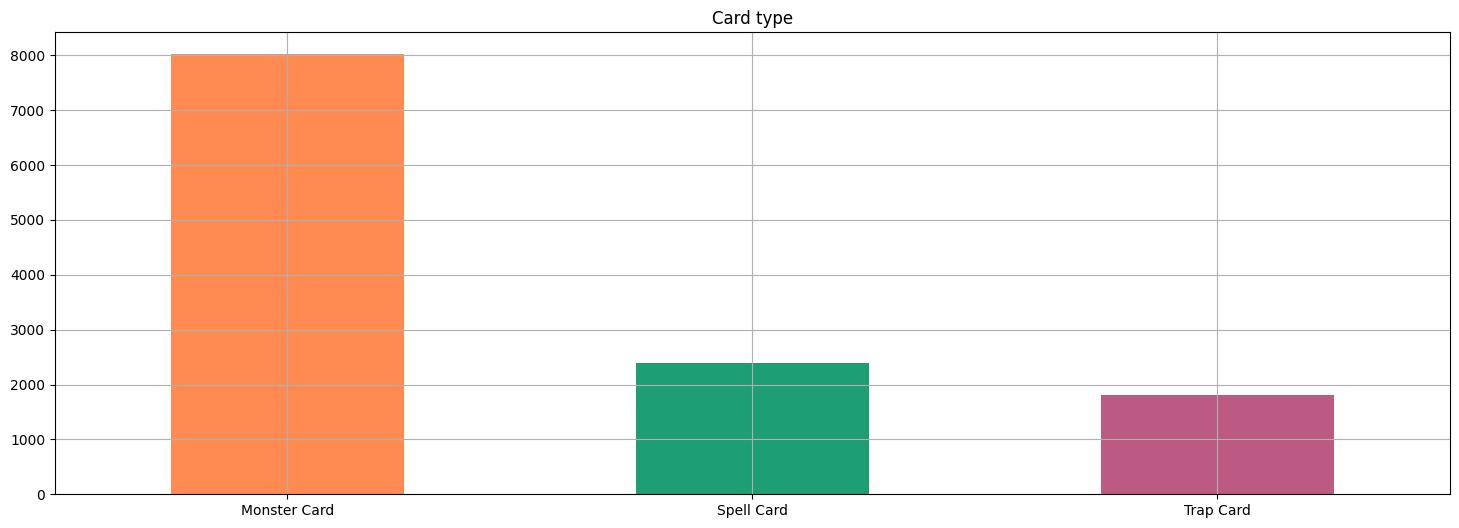

In [9]:
card_type_colors = [card_colors[i] for i in formatted_full_df['Card type'].value_counts().index]
formatted_full_df['Card type'].value_counts().plot.bar(figsize = (18,6), grid = True, rot=0, color = card_type_colors, title = 'Card type')
plt.show()

## Monsters

### Attributes

In [10]:
print('Total number of attributes:', formatted_monster_df['Attribute'].nunique())

Total number of attributes: 7


In [11]:
formatted_monster_df.drop(columns=['Card type']).groupby('Attribute').nunique()

,Name,Password,Primary type,Secondary type,Monster type,Level/Rank,ATK,DEF,Pendulum Scale,Link,Link Arrows,Effect type,Archseries,Artwork,Errata,TCG status,OCG status,Modification date
Attribute,,,,,,,,,,,,,,,,,,
DARK,2226,2185,7,6,23,14,70,63,12,6,42,154,452,3,3,7,7,2221
DIVINE,6,0,1,0,2,2,3,3,0,0,0,6,3,1,3,2,2,9
EARTH,1882,1860,7,6,23,12,71,60,12,4,29,128,330,3,3,6,6,1877
FIRE,668,664,8,6,22,12,43,40,8,4,22,85,185,3,3,4,6,666
LIGHT,1626,1588,7,6,23,14,58,50,10,5,30,131,385,3,3,6,7,1621
WATER,837,830,7,6,22,11,56,41,9,4,16,92,205,3,3,5,7,837
WIND,766,755,7,6,23,12,46,38,11,4,14,104,214,3,3,7,6,762


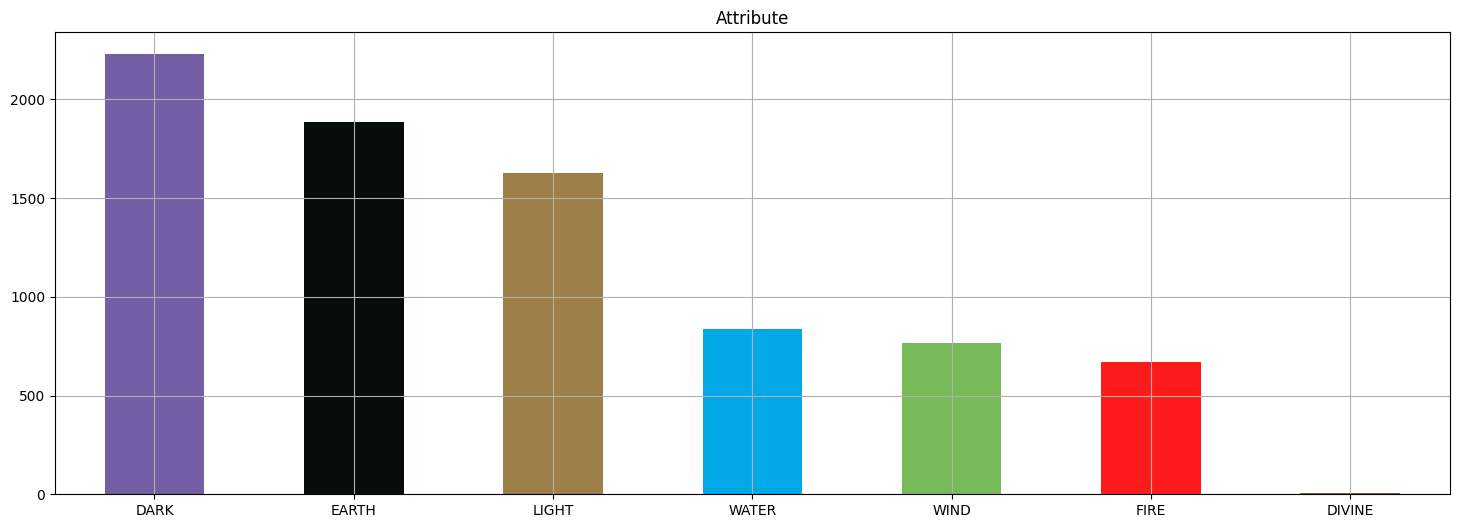

In [12]:
attribute_colors = [card_colors[i] for i in formatted_full_df['Attribute'].value_counts().index]
formatted_monster_df['Attribute'].value_counts().plot.bar(figsize = (18,6), grid = True, rot=0, color = attribute_colors, title = 'Attribute')
plt.show()

### Primary types

In [13]:
print('Total number of primary types:', formatted_monster_df['Primary type'].nunique())

Total number of primary types: 8


In [14]:
formatted_monster_df.drop(columns=['Card type']).groupby('Primary type').nunique()

,Name,Password,Secondary type,Attribute,Monster type,Level/Rank,ATK,DEF,Pendulum Scale,Link,Link Arrows,Effect type,Archseries,Artwork,Errata,TCG status,OCG status,Modification date
Primary type,,,,,,,,,,,,,,,,,,
Effect Monster,5439,5384,6,7,25,12,73,66,13,0,0,203,777,3,3,6,6,5408
Fusion Monster,430,424,1,6,23,12,48,46,4,0,0,68,141,3,3,4,6,429
Link Monster,372,362,0,6,23,0,39,0,0,6,62,51,138,3,2,5,5,369
Monster Token,1,0,0,1,1,1,1,1,0,0,0,0,1,0,0,0,1,1
Normal Monster,745,701,1,6,23,10,59,49,10,0,0,6,129,3,3,4,4,746
Ritual Monster,120,119,3,6,15,12,33,26,1,0,0,33,37,1,3,2,2,120
Synchro Monster,414,408,1,6,23,13,40,38,4,0,0,56,157,2,3,5,5,413
Xyz Monster,494,484,0,6,23,14,51,42,5,0,0,69,192,2,2,6,5,492


#### Has effect discrimination

In [15]:
has_effect = formatted_monster_df['Primary type'].where(formatted_monster_df['Effect type'].notna()).value_counts().rename('Effect')
no_effect = formatted_monster_df['Primary type'].where(formatted_monster_df['Effect type'].isna()).value_counts().rename('No Effect')
effect = pd.concat([has_effect,no_effect], axis=1).fillna(0).astype(int)
effect

,Effect,No Effect
Effect Monster,5438,1
Xyz Monster,492,2
Synchro Monster,411,3
Fusion Monster,369,61
Link Monster,366,6
Ritual Monster,105,15
Normal Monster,34,712
Monster Token,0,1


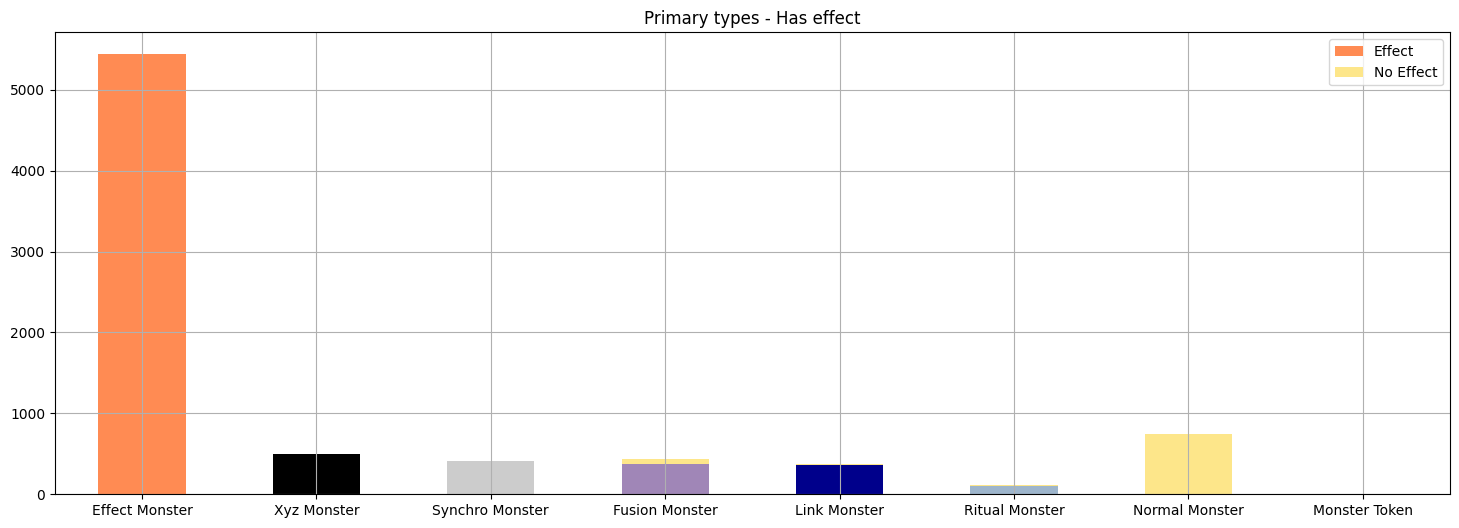

In [16]:
monster_type_colors = {'No Effect': card_colors['Normal Monster'], 'Effect': [card_colors[i] for i in effect.index]}
effect.plot.bar(figsize = (18,6), stacked = True, grid = True, rot=0,  legend=True, color = monster_type_colors, title = 'Primary types - Has effect')
# plt.yscale('log')
plt.show()

Obs: Normal monster can have effect if it is pendulum

#### Is pendulum discrimination

In [17]:
not_pendulum = formatted_monster_df['Primary type'].where(formatted_monster_df['Pendulum Scale'].isna()).value_counts().rename('Not Pendulum')
is_pendulum = formatted_monster_df['Primary type'].where(formatted_monster_df['Pendulum Scale'].notna()).value_counts().rename('Pendulum')
pendulum = pd.concat([not_pendulum,is_pendulum], axis=1).fillna(0).astype(int)
pendulum

,Not Pendulum,Pendulum
Effect Monster,5174,265
Normal Monster,708,38
Xyz Monster,485,9
Fusion Monster,420,10
Synchro Monster,407,7
Link Monster,372,0
Ritual Monster,119,1
Monster Token,1,0


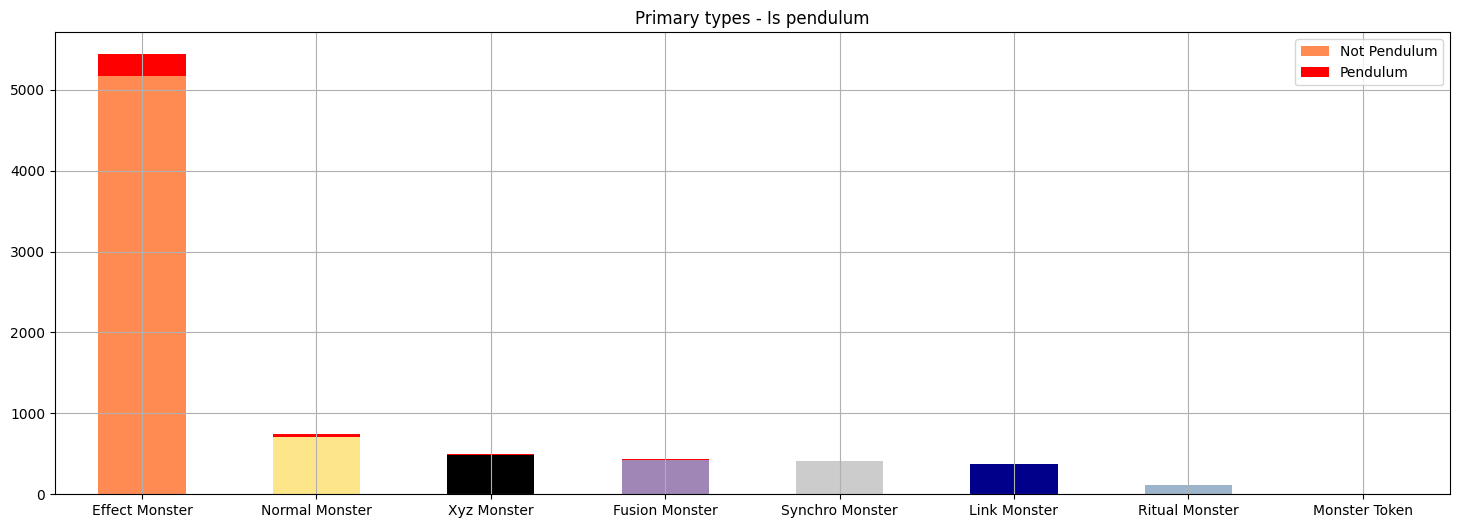

In [18]:
monster_type_colors_b = {'Pendulum': card_colors['Pendulum Monster'], 'Not Pendulum': [card_colors[i] for i in pendulum.index]}
pendulum.plot.bar(figsize = (18,6), stacked = True, grid = True, rot=0, color = monster_type_colors_b, legend=True, title = 'Primary types - Is pendulum')
plt.show()

#### By attribute

In [19]:
primmary_crosstab = pd.crosstab(formatted_full_df['Primary type'],formatted_full_df['Attribute'])
primmary_crosstab

Attribute,DARK,DIVINE,EARTH,FIRE,LIGHT,WATER,WIND
Primary type,,,,,,,
Effect Monster,1493,6,1308,453,1096,552,531
Fusion Monster,149,0,81,34,97,35,34
Link Monster,122,0,76,33,87,29,25
Monster Token,0,0,0,1,0,0,0
Normal Monster,186,0,250,52,82,109,67
Ritual Monster,36,0,17,7,34,20,6
Synchro Monster,108,0,70,50,76,36,74
Xyz Monster,135,0,82,38,154,56,29


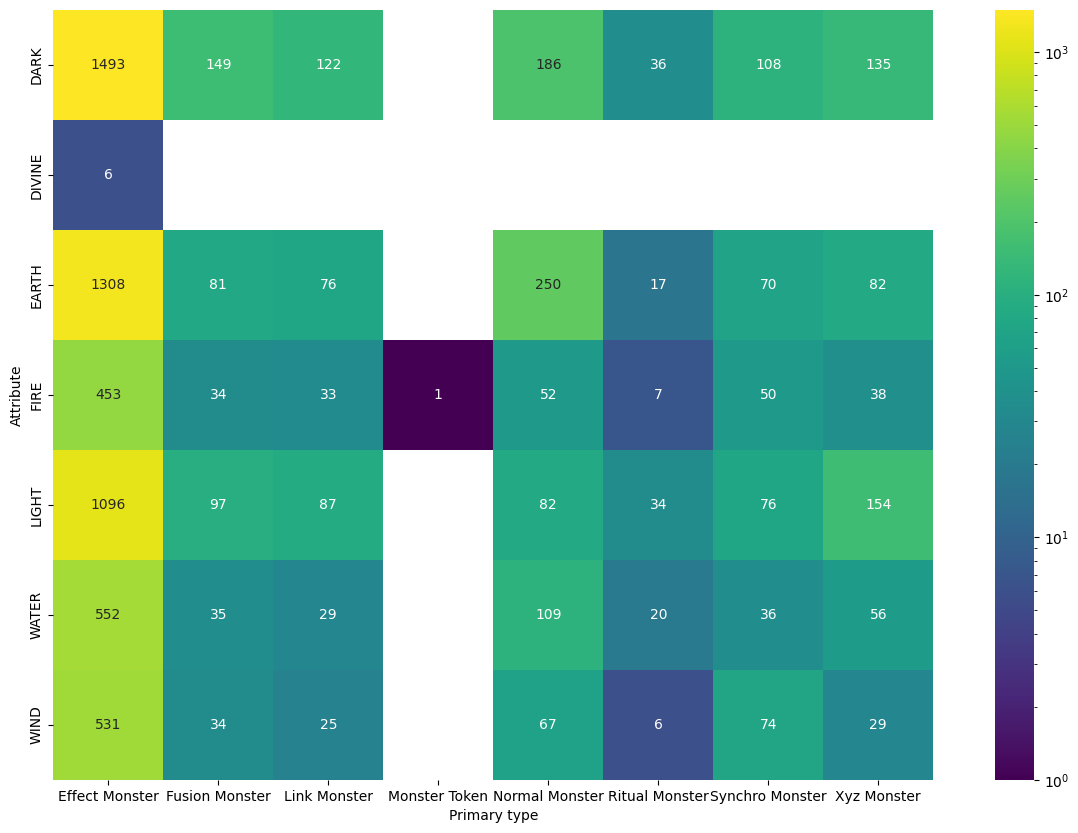

In [20]:
plt.figure(figsize = (16,10))
sns.heatmap(primmary_crosstab.T, annot=True, fmt="g", cmap='viridis', square=True, norm=LogNorm())
plt.show()

### Secondary types

In [21]:
print('Total number of secondary types:', formatted_monster_df['Secondary type'].nunique())

Total number of secondary types: 6


In [22]:
formatted_monster_df.drop(columns=['Card type', 'Link', 'Link Arrows']).groupby('Secondary type').nunique()

,Name,Password,Primary type,Attribute,Monster type,Level/Rank,ATK,DEF,Pendulum Scale,Effect type,Archseries,Artwork,Errata,TCG status,OCG status,Modification date
Secondary type,,,,,,,,,,,,,,,,
Flip monster,183,182,2,6,19,12,38,33,1,20,45,1,3,3,4,183
Gemini monster,45,45,1,6,18,8,17,19,0,6,13,0,3,1,1,45
Spirit monster,38,37,2,6,13,10,22,20,2,7,4,1,1,2,3,38
Toon monster,17,17,1,6,7,5,12,15,0,8,13,1,2,1,2,17
Tuner monster,476,467,5,6,23,9,32,32,7,58,135,3,3,4,4,475
Union monster,37,37,1,6,9,8,17,14,0,6,9,1,2,1,1,37


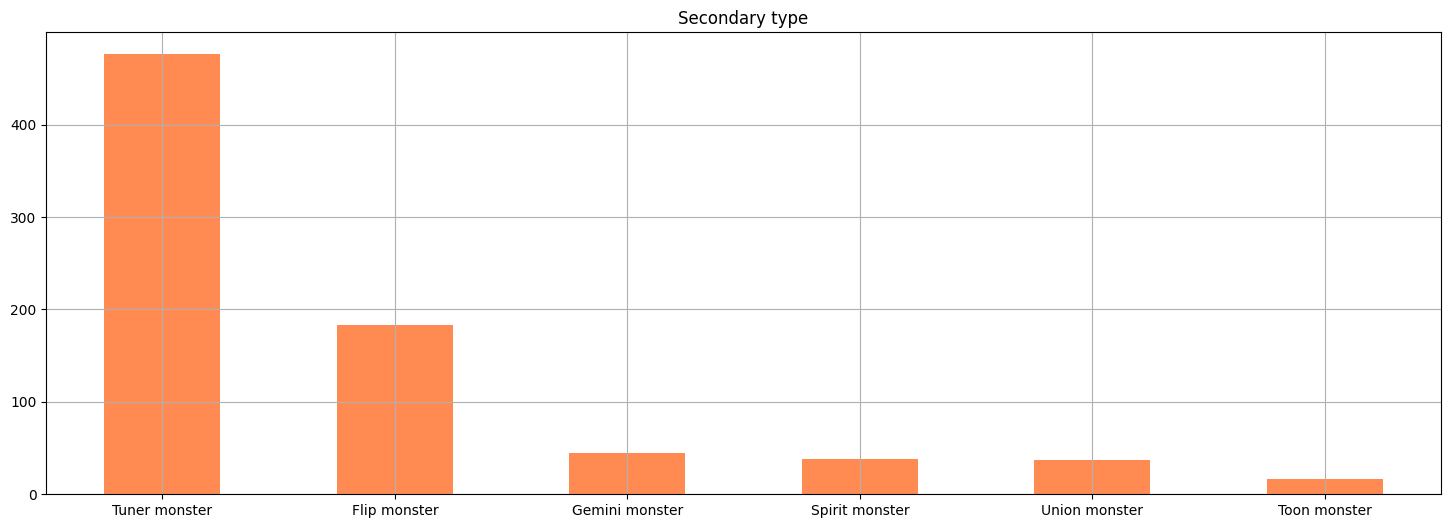

In [23]:
secondary_type_colors = card_colors['Effect Monster']
formatted_monster_df['Secondary type'].value_counts().plot.bar(figsize = (18,6), stacked = True, grid = True, rot=0, color = secondary_type_colors, legend=False, title = 'Secondary type')
plt.show()

#### By attribute

In [24]:
secondary_crosstab = pd.crosstab(formatted_full_df['Secondary type'],formatted_full_df['Attribute'])
secondary_crosstab

Attribute,DARK,EARTH,FIRE,LIGHT,WATER,WIND
Secondary type,,,,,,
Flip monster,51,61,10,31,13,17
Gemini monster,11,8,8,6,8,4
Spirit monster,5,6,6,4,6,11
Toon monster,7,5,1,2,1,1
Tuner monster,123,93,43,95,52,70
Union monster,6,9,3,12,4,3


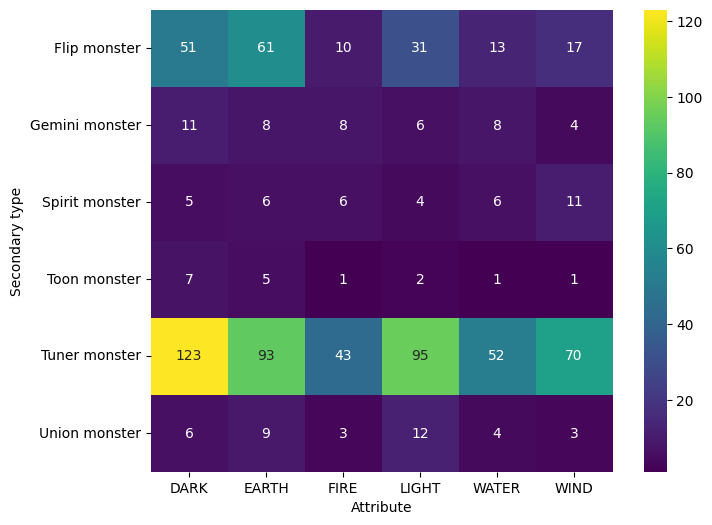

In [25]:
plt.figure(figsize = (8,6))
sns.heatmap(secondary_crosstab[secondary_crosstab>0], annot=True, fmt="g", cmap='viridis', square=True)
plt.show()

#### By secondary type

In [26]:
secondary_crosstab_b = pd.crosstab(formatted_full_df['Primary type'],formatted_full_df['Secondary type'], margins = True)
secondary_crosstab_b

Secondary type,Flip monster,Gemini monster,Spirit monster,Toon monster,Tuner monster,Union monster,All
Primary type,,,,,,,
Effect Monster,182,45,36,17,429,37,746
Fusion Monster,0,0,0,0,3,0,3
Normal Monster,0,0,0,0,12,0,12
Ritual Monster,1,0,2,0,2,0,5
Synchro Monster,0,0,0,0,30,0,30
All,183,45,38,17,476,37,796


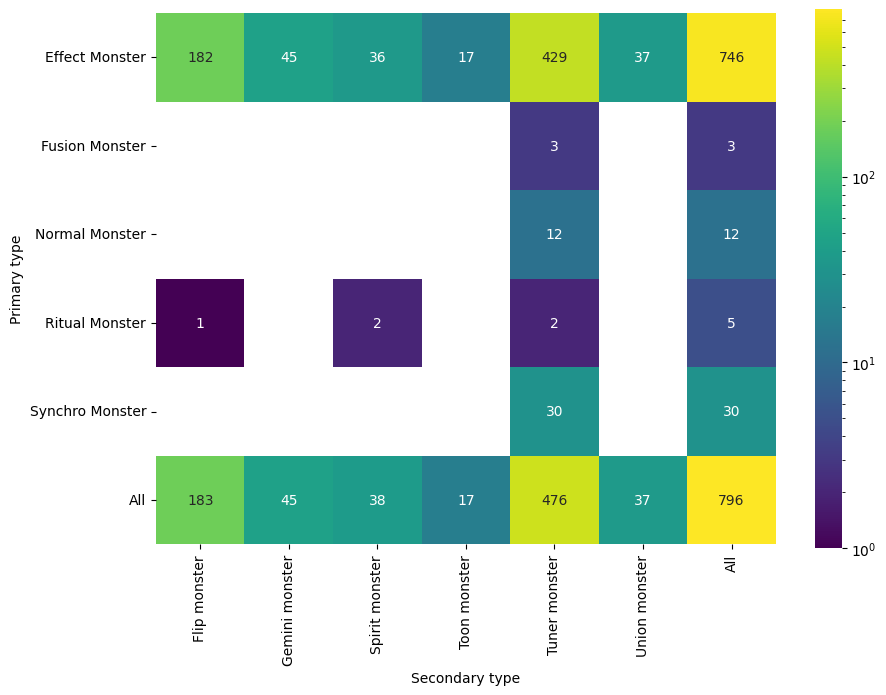

In [27]:
plt.figure(figsize = (10,7))
sns.heatmap(secondary_crosstab_b, annot=True, fmt="g", cmap='viridis', square=True, norm=LogNorm())
plt.show()

### Monster types

In [28]:
print('Total number of monster types:', formatted_monster_df['Monster type'].nunique())

Total number of monster types: 25


In [29]:
formatted_monster_df.drop(columns=['Card type']).groupby('Monster type').nunique()

,Name,Password,Primary type,Secondary type,Attribute,Level/Rank,ATK,DEF,Pendulum Scale,Link,Link Arrows,Effect type,Archseries,Artwork,Errata,TCG status,OCG status,Modification date
Monster type,,,,,,,,,,,,,,,,,,
Aqua,255,253,7,6,6,10,50,33,3,2,3,50,64,1,3,4,5,255
Beast,376,369,7,4,6,10,48,38,7,2,7,59,84,2,3,4,4,377
Beast-Warrior,237,233,7,3,6,10,36,29,6,3,7,57,47,2,3,4,5,236
Creator God,1,0,1,0,1,1,1,1,0,0,0,1,1,0,0,0,1,1
Cyberse,254,245,7,1,6,11,30,29,1,6,39,45,36,3,2,5,5,254
Dinosaur,122,121,6,1,6,10,35,30,4,2,3,35,24,1,2,3,3,122
Divine-Beast,5,0,1,0,1,1,3,3,0,0,0,5,2,1,3,2,2,8
Dragon,657,651,7,6,6,13,52,48,9,5,19,108,186,3,3,6,6,655
Fairy,516,502,7,5,6,12,43,38,9,4,12,81,115,3,3,6,6,514


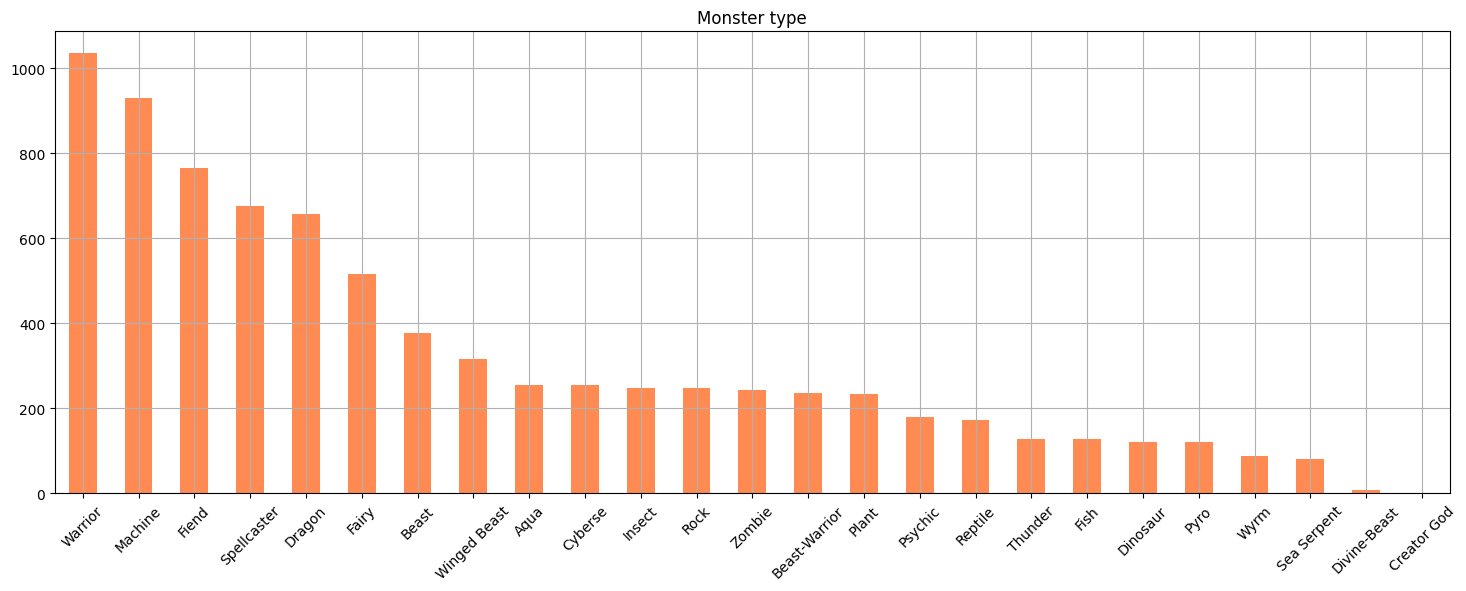

In [30]:
monster_type_colors = card_colors['Monster Card']
formatted_monster_df['Monster type'].value_counts().plot.bar(figsize = (18,6), grid = True, rot=45, color = monster_type_colors, title = 'Monster type')
plt.show()

#### By Attribute

In [31]:
monster_crosstab = pd.crosstab(formatted_full_df['Monster type'],formatted_full_df['Attribute'], dropna=False)
monster_crosstab

Attribute,DARK,DIVINE,EARTH,FIRE,LIGHT,WATER,WIND
Monster type,,,,,,,
Aqua,9,0,6,10,4,220,6
Beast,37,0,213,16,72,14,25
Beast-Warrior,37,0,82,54,33,16,15
Creator God,0,1,0,0,0,0,0
Cyberse,70,0,37,44,63,28,12
Dinosaur,11,0,60,32,5,8,6
Divine-Beast,0,8,0,0,0,0,0
Dragon,254,0,47,48,167,28,113
Fairy,57,0,63,17,327,27,25


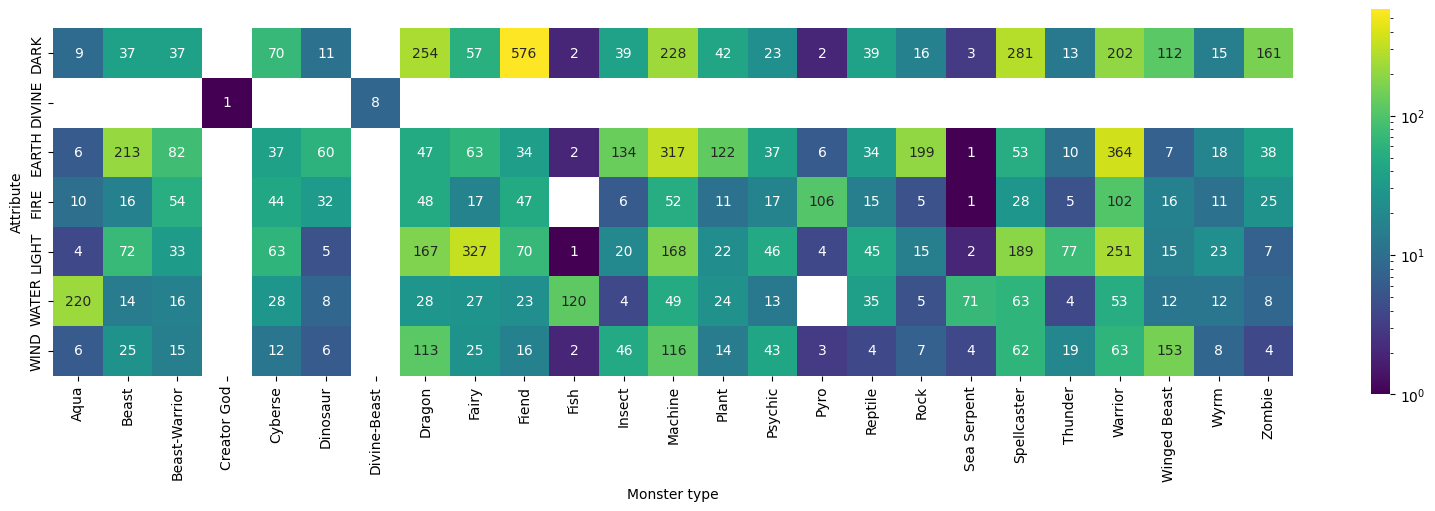

In [32]:
plt.figure(figsize = (20,5))
sns.heatmap(monster_crosstab[monster_crosstab>0].T, annot=True, fmt="g", cmap='viridis', square=True, norm=LogNorm())
plt.show()

#### By primary type

In [33]:
monster_crosstab_b = pd.crosstab(formatted_full_df['Monster type'],formatted_full_df['Primary type'], dropna=False)
monster_crosstab_b

Primary type,Effect Monster,Fusion Monster,Link Monster,Monster Token,Normal Monster,Ritual Monster,Synchro Monster,Xyz Monster
Monster type,,,,,,,,
Aqua,153,11,3,0,59,8,4,17
Beast,271,17,9,0,54,1,14,11
Beast-Warrior,163,11,9,0,21,2,8,23
Creator God,1,0,0,0,0,0,0,0
Cyberse,125,5,96,0,7,7,5,9
Dinosaur,87,7,3,0,18,0,4,3
Divine-Beast,5,0,0,0,0,0,0,0
Dragon,346,63,33,0,46,15,93,61
Fairy,366,22,25,0,36,17,18,32


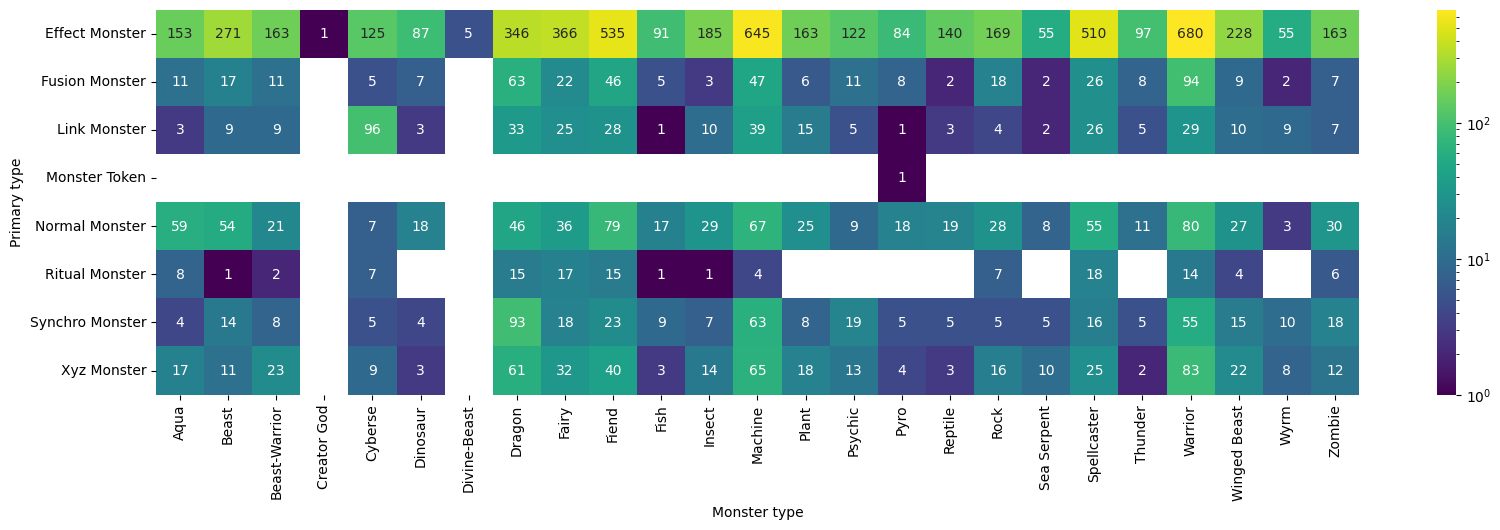

In [34]:
plt.figure(figsize = (20,5))
sns.heatmap(monster_crosstab_b[monster_crosstab_b>0].T, annot=True, fmt="g", cmap='viridis', square=True, norm = LogNorm())
plt.show()

#### By secondary type

In [35]:
monster_crosstab_c = pd.crosstab(formatted_full_df['Monster type'],formatted_full_df['Secondary type'], dropna=False)
monster_crosstab_c

Secondary type,Flip monster,Gemini monster,Spirit monster,Toon monster,Tuner monster,Union monster
Monster type,,,,,,
Aqua,4,4,1,1,10,3
Beast,15,1,2,0,22,0
Beast-Warrior,1,0,1,0,9,0
Cyberse,0,0,0,0,7,0
Dinosaur,0,0,0,0,7,0
Dragon,1,6,1,3,42,4
Fairy,8,2,7,0,22,5
Fiend,27,4,2,1,41,1
Fish,0,1,0,0,8,0


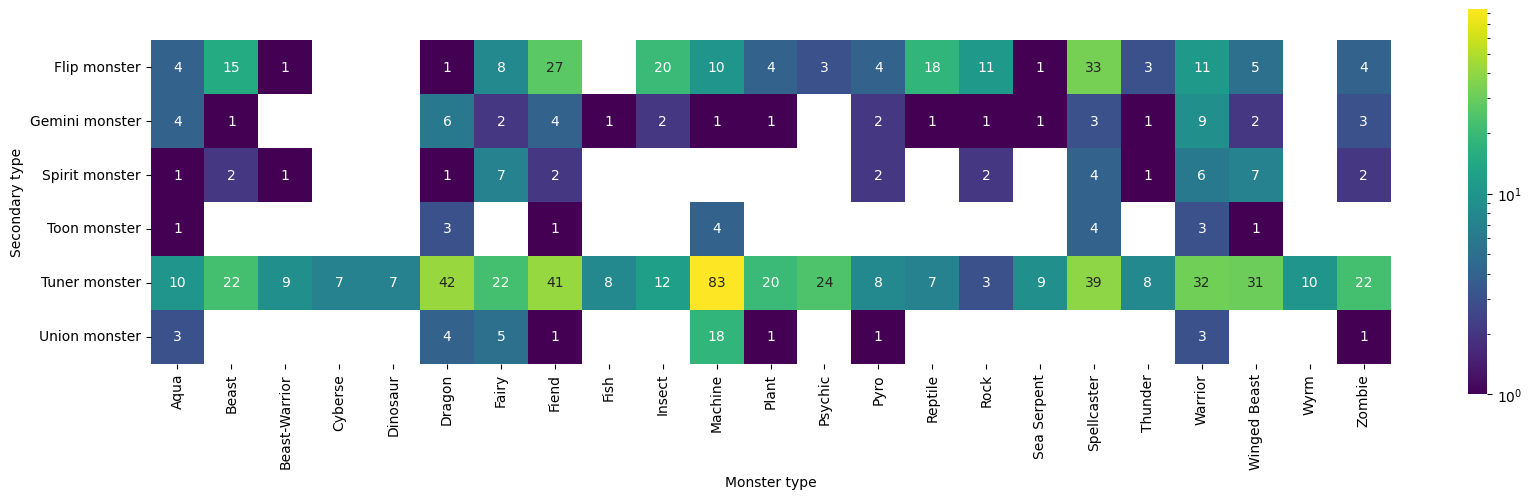

In [36]:
plt.figure(figsize = (20,5))
sns.heatmap(monster_crosstab_c[monster_crosstab_c>0].T, annot=True, fmt="g", cmap='viridis', square=True, norm = LogNorm())
plt.show()

### Effect type

In [37]:
print('Total number of effect types:', formatted_monster_df['Effect type'].explode().nunique())

Total number of effect types: 14


In [38]:
formatted_monster_df[formatted_monster_df['Effect type'].notna()].drop(columns=['Card type']).explode('Effect type').groupby('Effect type').nunique()

,Name,Password,Primary type,Secondary type,Attribute,Monster type,Level/Rank,ATK,DEF,Pendulum Scale,Link,Link Arrows,Archseries,Artwork,Errata,TCG status,OCG status,Modification date
Effect type,,,,,,,,,,,,,,,,,,
Activation condition,1,1,1,0,1,1,1,1,1,1,0,0,1,0,0,1,1,1
Condition,3084,3014,7,6,7,25,14,63,64,13,6,54,644,3,3,5,6,3064
Continuous Effect,2154,2138,6,5,7,24,14,59,52,12,6,48,560,3,3,5,4,2150
Continuous-like Effect,235,234,6,3,6,21,11,42,36,13,1,2,72,2,3,3,3,235
Flip effect,169,168,1,1,6,19,12,38,33,1,0,0,43,1,3,3,4,169
Ignition Effect,2608,2581,6,6,7,24,13,66,61,12,5,42,640,3,3,5,6,2599
Ignition-like Effect,223,211,6,2,6,20,12,35,33,13,1,1,75,1,3,3,6,223
Lingering effect,17,17,2,1,6,12,7,12,14,0,2,2,10,0,0,2,2,16
Maintenance cost,44,44,3,0,6,12,8,21,18,2,1,1,8,0,1,1,1,44


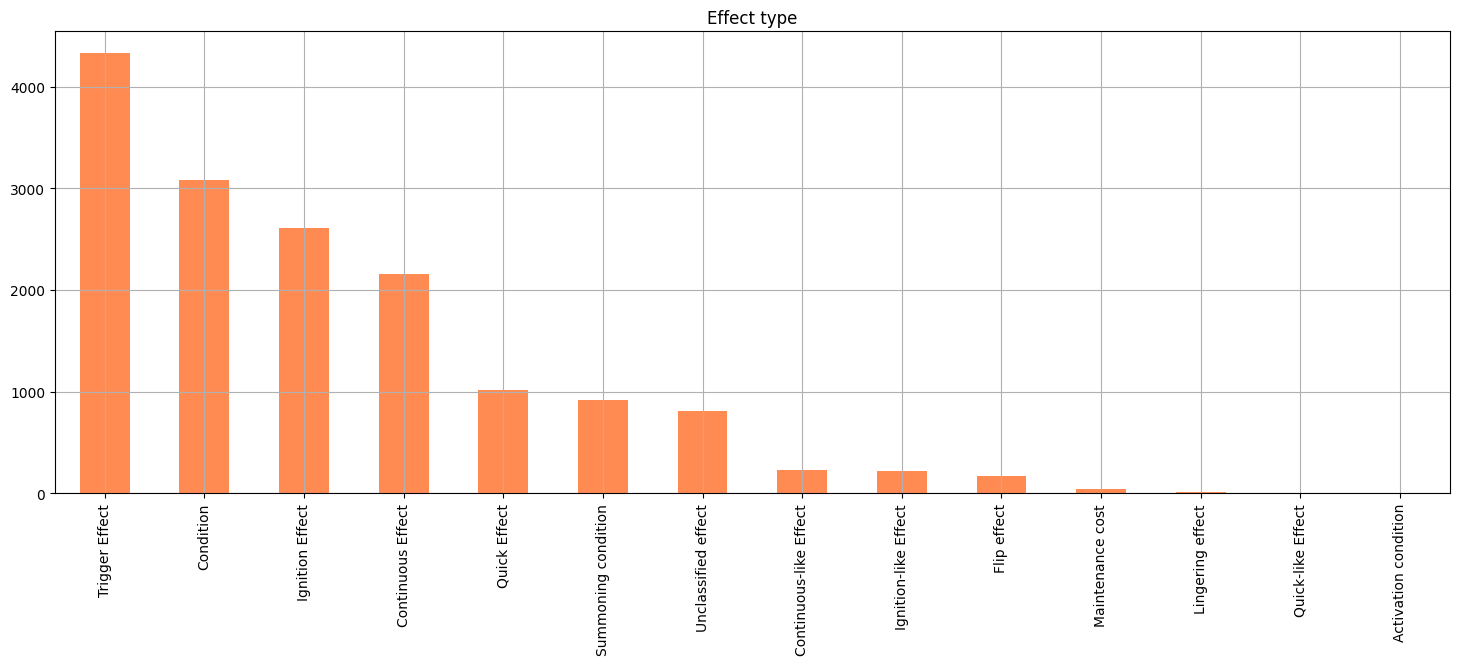

In [39]:
monster_effect_colors = card_colors['Effect Monster']
formatted_monster_df['Effect type'].explode('Effect type').value_counts().plot.bar(figsize = (18,6), grid = True, color = monster_effect_colors, title='Effect type')
# plt.yscale('log')
plt.show()

### ATK

In [40]:
print('Total number of ATK values:', formatted_monster_df['ATK'].nunique())

Total number of ATK values: 82


In [ ]:
formatted_monster_df.drop(columns=['Card type']).groupby('ATK').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

In [ ]:
atk_colors = card_colors['Monster Card']
formatted_monster_df['DEF'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, color = atk_colors, title = 'ATK')
plt.show()

### DEF

In [ ]:
print('Total number of DEF values:', formatted_monster_df['DEF'].nunique())

In [ ]:
formatted_monster_df.drop(columns=['Card type']).groupby('DEF').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

In [ ]:
def_colors = card_colors['Monster Card']
formatted_monster_df['DEF'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, color = def_colors, title = 'DEF')
plt.show()

### Level/Rank

In [ ]:
formatted_monster_df.drop(columns=['Card type', 'Link', 'Link Arrows']).groupby('Level/Rank').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

In [ ]:
stars_colors = card_colors['Level']
formatted_monster_df['Level/Rank'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, rot=0, color= stars_colors, title = 'Level/Rank')
plt.show()

#### ATK statistics

In [ ]:
formatted_monster_df[['Level/Rank','ATK']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Level/Rank').describe()

#### DEF statistics

In [ ]:
formatted_monster_df[['Level/Rank','DEF']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Level/Rank').describe()

### Pendulum scale

In [ ]:
formatted_monster_df.drop(columns=['Card type', 'Link', 'Link Arrows']).groupby('Pendulum Scale').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

In [ ]:
scales_colors = card_colors['Pendulum Monster']
formatted_monster_df['Pendulum Scale'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, rot=0, color = scales_colors, title = 'Pendulum scale')
plt.show()

#### ATK statistics

In [ ]:
formatted_monster_df[['Pendulum Scale','ATK']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Pendulum Scale').describe()

#### DEF statistics

In [ ]:
formatted_monster_df[['Pendulum Scale','DEF']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Pendulum Scale').describe()

#### Level/Rank statistics

In [ ]:
formatted_monster_df[['Pendulum Scale','Level/Rank']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Pendulum Scale').describe()

### Link

In [ ]:
formatted_monster_df.drop(columns=['Card type', 'Primary type', 'Secondary type','Level/Rank','DEF','Pendulum Scale']).groupby('Link').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

In [ ]:
link_colors = card_colors['Link Monster']
formatted_monster_df['Link'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, rot=0, color = link_colors, title='Link')
plt.show()

#### ATK statistics

In [ ]:
formatted_monster_df[['Link','ATK']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Link').describe()

### Link Arrows

#### By combination

In [ ]:
print('Total number of link arrow combinations:', formatted_monster_df['Link Arrows'].nunique())

In [ ]:
formatted_monster_df.drop(columns=['Card type', 'Primary type', 'Level/Rank', 'Pendulum Scale', 'Link', 'Secondary type', 'DEF']).groupby('Link Arrows').nunique()

In [ ]:
arrows_colors = card_colors['Link Monster']
formatted_monster_df['Link Arrows'].value_counts().plot.barh(figsize = (10,20), grid = True, color = arrows_colors, title = 'Link arrows combinations')
plt.show()

#### By unique

In [ ]:
formatted_monster_df[formatted_monster_df['Link Arrows'].notna()].drop(columns=['Card type', 'Primary type', 'Level/Rank', 'Pendulum Scale', 'Secondary type', 'DEF']).explode('Link Arrows').groupby('Link Arrows').nunique()

In [ ]:
arrows_colors_b = card_colors['Link Monster']
formatted_monster_df['Link Arrows'].explode('Link Arrows').value_counts().plot.bar(figsize = (18,6), grid = True, color = arrows_colors_b, title = 'Link arrows')
plt.show()

#### By link

In [ ]:
arrow_per_link = formatted_monster_df[['Link Arrows','Link']].explode('Link Arrows').dropna()
arrow_crosstab = pd.crosstab(arrow_per_link['Link Arrows'],arrow_per_link['Link'])
arrow_crosstab

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(arrow_crosstab[arrow_crosstab>0].T, annot=True, fmt="g", cmap='viridis', square=True, norm=LogNorm())
plt.show()

## Spell & Trap

### Properties

In [ ]:
print('Total number of properties:', formatted_st_df['Property'].nunique())

In [ ]:
formatted_st_df.drop(columns=['Card type']).groupby('Property').nunique()

In [ ]:
st_colors = [card_colors[i] for i in formatted_full_df[['Card type','Property']].value_counts().index.get_level_values(0)]
formatted_st_df['Property'].value_counts().plot.bar(figsize = (18,6), grid = True, rot=45, color = st_colors, title = 'Property')
plt.show()

### Effect type

In [ ]:
print('Total number of effect types:', formatted_st_df['Effect type'].explode().nunique())

In [ ]:
formatted_st_df.explode('Effect type').groupby('Effect type').nunique()

#### Spell & Trap discrimination

In [ ]:
spell = formatted_spell_df['Effect type'].explode('Effect type').value_counts().rename('Spell Card')
trap = formatted_trap_df['Effect type'].explode('Effect type').value_counts().rename('Trap Card')
st_diff = pd.concat([spell, trap], axis = 1).fillna(0).astype(int)
st_diff

In [ ]:
st_diff_colors = {'Spell Card': card_colors['Spell Card'], 'Trap Card': card_colors['Trap Card']}
st_diff.plot.bar(figsize = (18,6), stacked = True, grid = True, rot=45, color = st_diff_colors, title = 'Effect type')
plt.show()

## Archseries

In [ ]:
exploded_archseries = formatted_full_df.explode('Archseries')
print('Total number of Archseries:', exploded_archseries['Archseries'].nunique())

In [ ]:
exploded_archseries.groupby('Archseries').nunique()

In [ ]:
exploded_archseries['Archseries'].value_counts().plot.barh(figsize = (10,200), grid = True, title = 'Archtypes/Series')
plt.show()

### By card type

In [ ]:
archseries_crosstab = pd.crosstab(exploded_archseries['Archseries'],exploded_archseries['Card type'], margins = True)
archseries_crosstab

### By primary type

In [ ]:
archseries_crosstab_b = pd.crosstab(exploded_archseries['Archseries'],exploded_archseries['Primary type'], margins = True)
archseries_crosstab_b



### By secondary type

In [ ]:
archseries_crosstab_c = pd.crosstab(exploded_archseries['Archseries'],exploded_archseries['Secondary type'], margins = True)
archseries_crosstab_c

### By monster type

In [ ]:
archseries_crosstab_d = pd.crosstab(exploded_archseries['Archseries'],exploded_archseries['Monster type'], margins = True)
archseries_crosstab_d

### By property

In [ ]:
archseries_crosstab_e = pd.crosstab(exploded_archseries['Archseries'],exploded_archseries['Property'], margins = True)
archseries_crosstab_e

## Artworks

In [ ]:
print('Total number of cards with edited or alternate artworks:', formatted_full_df['Artwork'].count())

In [ ]:
formatted_full_df[['Name','Password','TCG status','OCG status','Artwork']][formatted_full_df['Artwork'].notna()]

In [ ]:
artwork_value_counts = formatted_full_df['Artwork'].value_counts()
plt.figure(figsize=(20,8))
plt.title('Artworks')
venn2(subsets = (artwork_value_counts[('Alternate',)], artwork_value_counts[('Edited',)],artwork_value_counts[('Alternate','Edited')]), set_labels = ('Alternate artwork', 'Edited artwork'))
plt.show()

### By card type

In [ ]:
artwork_crosstab = pd.crosstab(formatted_full_df['Artwork'], formatted_full_df['Card type'])
artwork_crosstab

### By primary type

In [ ]:
artwork_crosstab_b = pd.crosstab(formatted_full_df['Artwork'], formatted_full_df['Primary type'])
artwork_crosstab_b

More granularity is unnecessary

## Errata

In [ ]:
print('Total number of cards with name or type errata:', formatted_full_df['Errata'].count())

In [ ]:
formatted_full_df[['Name','Password','TCG status','OCG status','Errata']][formatted_full_df['Errata'].notna()]

In [ ]:
errata_value_counts = formatted_full_df['Errata'].value_counts()
plt.figure(figsize=(20,8))
plt.title('Errata')
venn2(subsets = (errata_value_counts[('Name',)], errata_value_counts[('Type',)],errata_value_counts[('Name','Type')]), set_labels = ('Name Errata', 'Type errata'))
plt.show()

### By card type

In [ ]:
errata_crosstab = pd.crosstab(formatted_full_df['Errata'], formatted_full_df['Card type'])
errata_crosstab

### By primary type

In [ ]:
errata_crosstab_b = pd.crosstab(formatted_full_df['Errata'], formatted_full_df['Primary type'])
errata_crosstab_b

More granularity is unnecessary

### By artwork

In [ ]:
errata_crosstab_c = pd.crosstab(formatted_full_df['Artwork'], formatted_full_df['Errata'])
errata_crosstab_c

## TCG & OCG status

### TGC status

In [ ]:
print('Total number of TCG status:', formatted_full_df['TCG status'].nunique())

In [ ]:
formatted_full_df.groupby('TCG status', dropna=False).nunique()

In [ ]:
formatted_full_df['TCG status'].value_counts(dropna = False).plot.bar(figsize = (18,6), logy=True, grid = True, rot=45, title = 'TCG status')
plt.show()

#### By card type

In [ ]:
# Remove unlimited
tcg_crosstab = pd.crosstab(formatted_full_df['Card type'], formatted_full_df['TCG status']).drop(['Unlimited'], axis=1)
tcg_crosstab

In [ ]:
plt.figure(figsize = (12,6))
sns.heatmap(tcg_crosstab[tcg_crosstab>0], annot=True, fmt="g", cmap='viridis', norm=LogNorm())
plt.show()

#### By monster type

In [ ]:
# Remove unlimited
tcg_crosstab_b = pd.crosstab(formatted_full_df['Monster type'], formatted_full_df['TCG status']).drop(['Unlimited'], axis=1)
tcg_crosstab_b

In [ ]:
plt.figure(figsize = (20,5))
sns.heatmap(tcg_crosstab_b[tcg_crosstab_b>0].T, annot=True, fmt="g", cmap='viridis', square = True)
plt.show()

#### By archseries

In [ ]:
# Remove unlimited
tcg_crosstab_c = pd.crosstab(exploded_archseries['Archseries'].where(exploded_archseries['OCG status']!='Unlimited'), exploded_archseries['TCG status'], margins = True)
tcg_crosstab_c

### OCG status

In [ ]:
print('Total number of OCG status:', formatted_full_df['OCG status'].nunique())

In [ ]:
formatted_full_df.groupby('OCG status', dropna=False).nunique()

In [ ]:
formatted_full_df['OCG status'].value_counts(dropna = False).plot.bar(figsize = (18,6), logy=True, grid = True, rot=45, title = 'TCG status')
plt.show()

#### By card type

In [ ]:
# Remove unlimited
ocg_crosstab = pd.crosstab(formatted_full_df['Card type'], formatted_full_df['OCG status']).drop(['Unlimited'], axis=1)
ocg_crosstab

In [ ]:
plt.figure(figsize = (12,6))
sns.heatmap(ocg_crosstab[ocg_crosstab>0], annot=True, fmt="g", cmap='viridis')
plt.show()

#### By monster type

In [ ]:
ocg_crosstab_b = pd.crosstab(formatted_full_df['Monster type'], formatted_full_df['OCG status']).drop(['Unlimited'], axis=1)
ocg_crosstab_b

In [ ]:
plt.figure(figsize = (20,5))
sns.heatmap(ocg_crosstab_b[ocg_crosstab_b>0].T, annot=True, fmt="g", cmap='viridis', square = True)
plt.show()

#### By archseries

In [ ]:
# Remove unlimited
ocg_crosstab_c = pd.crosstab(exploded_archseries['Archseries'].where(exploded_archseries['OCG status']!='Unlimited'), exploded_archseries['OCG status'], margins = True)
ocg_crosstab_c

### TCG vs. OCG status

In [ ]:
cg_crosstab = pd.crosstab(formatted_full_df['OCG status'],formatted_full_df['TCG status'], dropna=False, margins = False)
cg_crosstab

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(cg_crosstab[cg_crosstab>0], annot=True, fmt="g", cmap='viridis', square=True, norm=LogNorm())
plt.show()

# Searches

In [ ]:
formatted_full_df.loc[formatted_full_df['OCG status'] == 'Not yet released'].loc[formatted_full_df['TCG status'] == 'Not yet released']

# HTML export

In [ ]:
! jupyter nbconvert Cards.ipynb --output-dir='../' --to=HTML --TagRemovePreprocessor.enabled=True --TagRemovePreprocessor.remove_cell_tags='exclude' --TemplateExporter.exclude_input=True --TemplateExporter.exclude_input_prompt=True --TemplateExporter.exclude_output_prompt=True

# Git

In [ ]:
! git add "../*[Cc]ards*"

In [ ]:
! git commit -m {"'Cards update-" + pd.Timestamp.now().strftime("%d%m%Y")+"'"}

In [ ]:
! git push